In [43]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Threshold Adjustment

👇 Load the player `player_performances.csv` dataset to see what you will be working with.

In [5]:
data = pd.read_csv('/Users/kendrickchuah/code/reedyoh/data-threshold-adjustments/data/ML_Player_performance.csv')

data.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [11]:
data.shape

(1328, 20)

ℹ️ Each observation represents a player and each column a characteristic of performance. The target `target_5y` defines whether the player has had a professional career of less than 5 years [0] or 5 years or more [1].

# Preprocessing

👇 To avoid spending too much time on the preprocessing, Robust Scale the entire feature set. This practice is not optimal, but can be used for preliminary preprocessing and/or to get models up and running quickly.

Save the scaled feature set as `X_scaled`.

In [15]:
X = data.drop(['target_5y'], axis=1)
y = data['target_5y']

transformer = RobustScaler().fit(X)
X_scaled = transformer.transform(X)
X_scaled.shape

(1328, 19)

### ☑️ Check your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('scaled_features',
                         scaled_features = X_scaled
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/kendrickchuah/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/kendrickchuah/code/reedyoh/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_scaled_features.py::TestScaled_features::test_scaled_features PASSED [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/scaled_features.pickle

git commit -m 'Completed scaled_features step'

git push origin master



In [13]:
!git add tests/scaled_features.pickle

!git commit -m 'Completed scaled_features step'

!git push origin master

[master 895dbb9] Completed scaled_features step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/scaled_features.pickle
Enumerating objects: 17, done.
Counting objects: 100% (17/17), done.
Delta compression using up to 8 threads
Compressing objects: 100% (15/15), done.
Writing objects: 100% (17/17), 44.43 KiB | 2.61 MiB/s, done.
Total 17 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
To github.com:reedyoh/data-threshold-adjustments.git
 * [new branch]      master -> master


# Base modeling

🎯 The task is to detect players who will last 5 years minimum as professionals, with a 90% guarantee.

👇 Is a default Logistic Regression model going to satisfy the coach's requirements? Use cross-validation and save the score that supports your answer under variable name `base_score`.

In [17]:
model = LogisticRegression().fit(X, y)
base_score = model.score(X, y)
base_score

/Users/kendrickchuah/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7213855421686747

### ☑️ Check your code

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('base_precision',
                         score = base_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/kendrickchuah/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/kendrickchuah/code/reedyoh/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_precision.py::TestBase_precision::test_precision_score PASSED  [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/base_precision.pickle

git commit -m 'Completed base_precision step'

git push origin master



In [19]:
!git add tests/base_precision.pickle

!git commit -m 'Completed base_precision step'

!git push origin master

[master 2f89a6b] Completed base_precision step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/base_precision.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 527 bytes | 527.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:reedyoh/data-threshold-adjustments.git
   895dbb9..2f89a6b  master -> master


# Threshold adjustment

👇 Find the decision threshold that guarantees a 90% precision for a player to last 5 years or more as a professional. Save the threshold under variable name `new_threshold`.

<details>
<summary>💡 Hint</summary>

- Make cross validated probability predictions with [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
    
- Plug the probabilities into [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) to generate precision scores at different thresholds

- Find out which threshold guarantees a precision of 0.9
      
</details>



In [38]:
no, yes = cross_val_predict(model, X.values, y.values, cv=5, method='predict_proba').T

precision, recall, thresholds = precision_recall_curve(y, yes)

precision

/Users/kendrickchuah/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kendrickchuah/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

array([0.62198795, 0.62245667, 0.62292609, ..., 1.        , 1.        ,
       1.        ])

In [41]:
scores = pd.DataFrame({'threshold':thresholds,
                       'precision': precision[:-1],
                       'recall':recall[:-1]})
scores

,threshold,precision,recall
0,0.105032,0.621988,1.000000
1,0.108135,0.622457,1.000000
2,0.122485,0.622926,1.000000
3,0.132530,0.623396,1.000000
4,0.150612,0.623867,1.000000
...,...,...,...
1294,0.994387,1.000000,0.006053
1295,0.995530,1.000000,0.004843
1296,0.996827,1.000000,0.003632
1297,0.998088,1.000000,0.002421


Text(0.5, 0, 'recall')

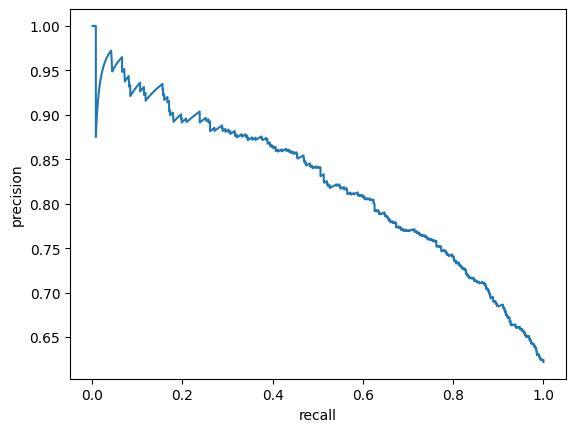

In [44]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [60]:
new_threshold = scores[scores['precision'] == 0.9].threshold.min()
new_threshold

0.8620412027079176

### ☑️ Check your code

In [56]:
from nbresult import ChallengeResult

result = ChallengeResult('decision_threshold',
                         threshold = new_threshold
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/kendrickchuah/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/kendrickchuah/code/reedyoh/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_decision_threshold.py::TestDecision_threshold::test_new_threshold PASSED [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/decision_threshold.pickle

git commit -m 'Completed decision_threshold step'

git push origin master



In [61]:
!git add tests/decision_threshold.pickle

!git commit -m 'Completed decision_threshold step'

!git push origin master

[master b35c968] Completed decision_threshold step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/decision_threshold.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 532 bytes | 532.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:reedyoh/data-threshold-adjustments.git
   2f89a6b..b35c968  master -> master


# Using the new threshold

🎯 The coach has spotted a potentially interesting player, but wants your 90% guarantee that he would last 5 years minimum as a pro. Download the player's data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_New_player.csv).

In [63]:
new_player = pd.read_csv("/Users/kendrickchuah/code/reedyoh/data-threshold-adjustments/data/ML_New_player.csv")

new_player

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,11.1,2.6,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2


❓ Would you risk recommending the player to the coach? Save your answer as string under variable name `recommendation` as "recommend" or "not recommend".

In [64]:
model = LogisticRegression()
model.fit(X, y)

def custom_predict(X, custom_threshold):
    probs = model.predict_proba(X) # Get likelihood of each sample being classified as 0 or 1
    fiveyear_probs = probs[:, 1] # Only keep expensive likelihoods (1) 
    return (fiveyear_probs > custom_threshold).astype(int)

updated_preds = custom_predict(X=new_player, custom_threshold=0.8620412027079176)
updated_preds

/Users/kendrickchuah/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1])

In [65]:
recommendation = 'recommend'

### ☑️ Check your code

In [66]:
from nbresult import ChallengeResult

result = ChallengeResult('recommendation',
                         recommendation = recommendation
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/kendrickchuah/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/kendrickchuah/code/reedyoh/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_recommendation.py::TestRecommendation::test_recommendation PASSED   [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/recommendation.pickle

git commit -m 'Completed recommendation step'

git push origin master



In [67]:
!git add tests/recommendation.pickle

!git commit -m 'Completed recommendation step'

!git push origin master

[master cd4cf7c] Completed recommendation step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/recommendation.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 439 bytes | 439.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:reedyoh/data-threshold-adjustments.git
   b35c968..cd4cf7c  master -> master


# 🏁